In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 2.6 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UphOztRZZUp98uYVgmma")
project = rf.workspace("sohila-byynn").project("grad-hohc6")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grad-3 in yolov11:: 100%|██████████| 2286/2286 [00:00<00:00, 5303.32it/s]


In [5]:
dataset.location

'/content/Grad-3'

In [6]:
!yolo task=detect mode=train data ={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 106MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Grad-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

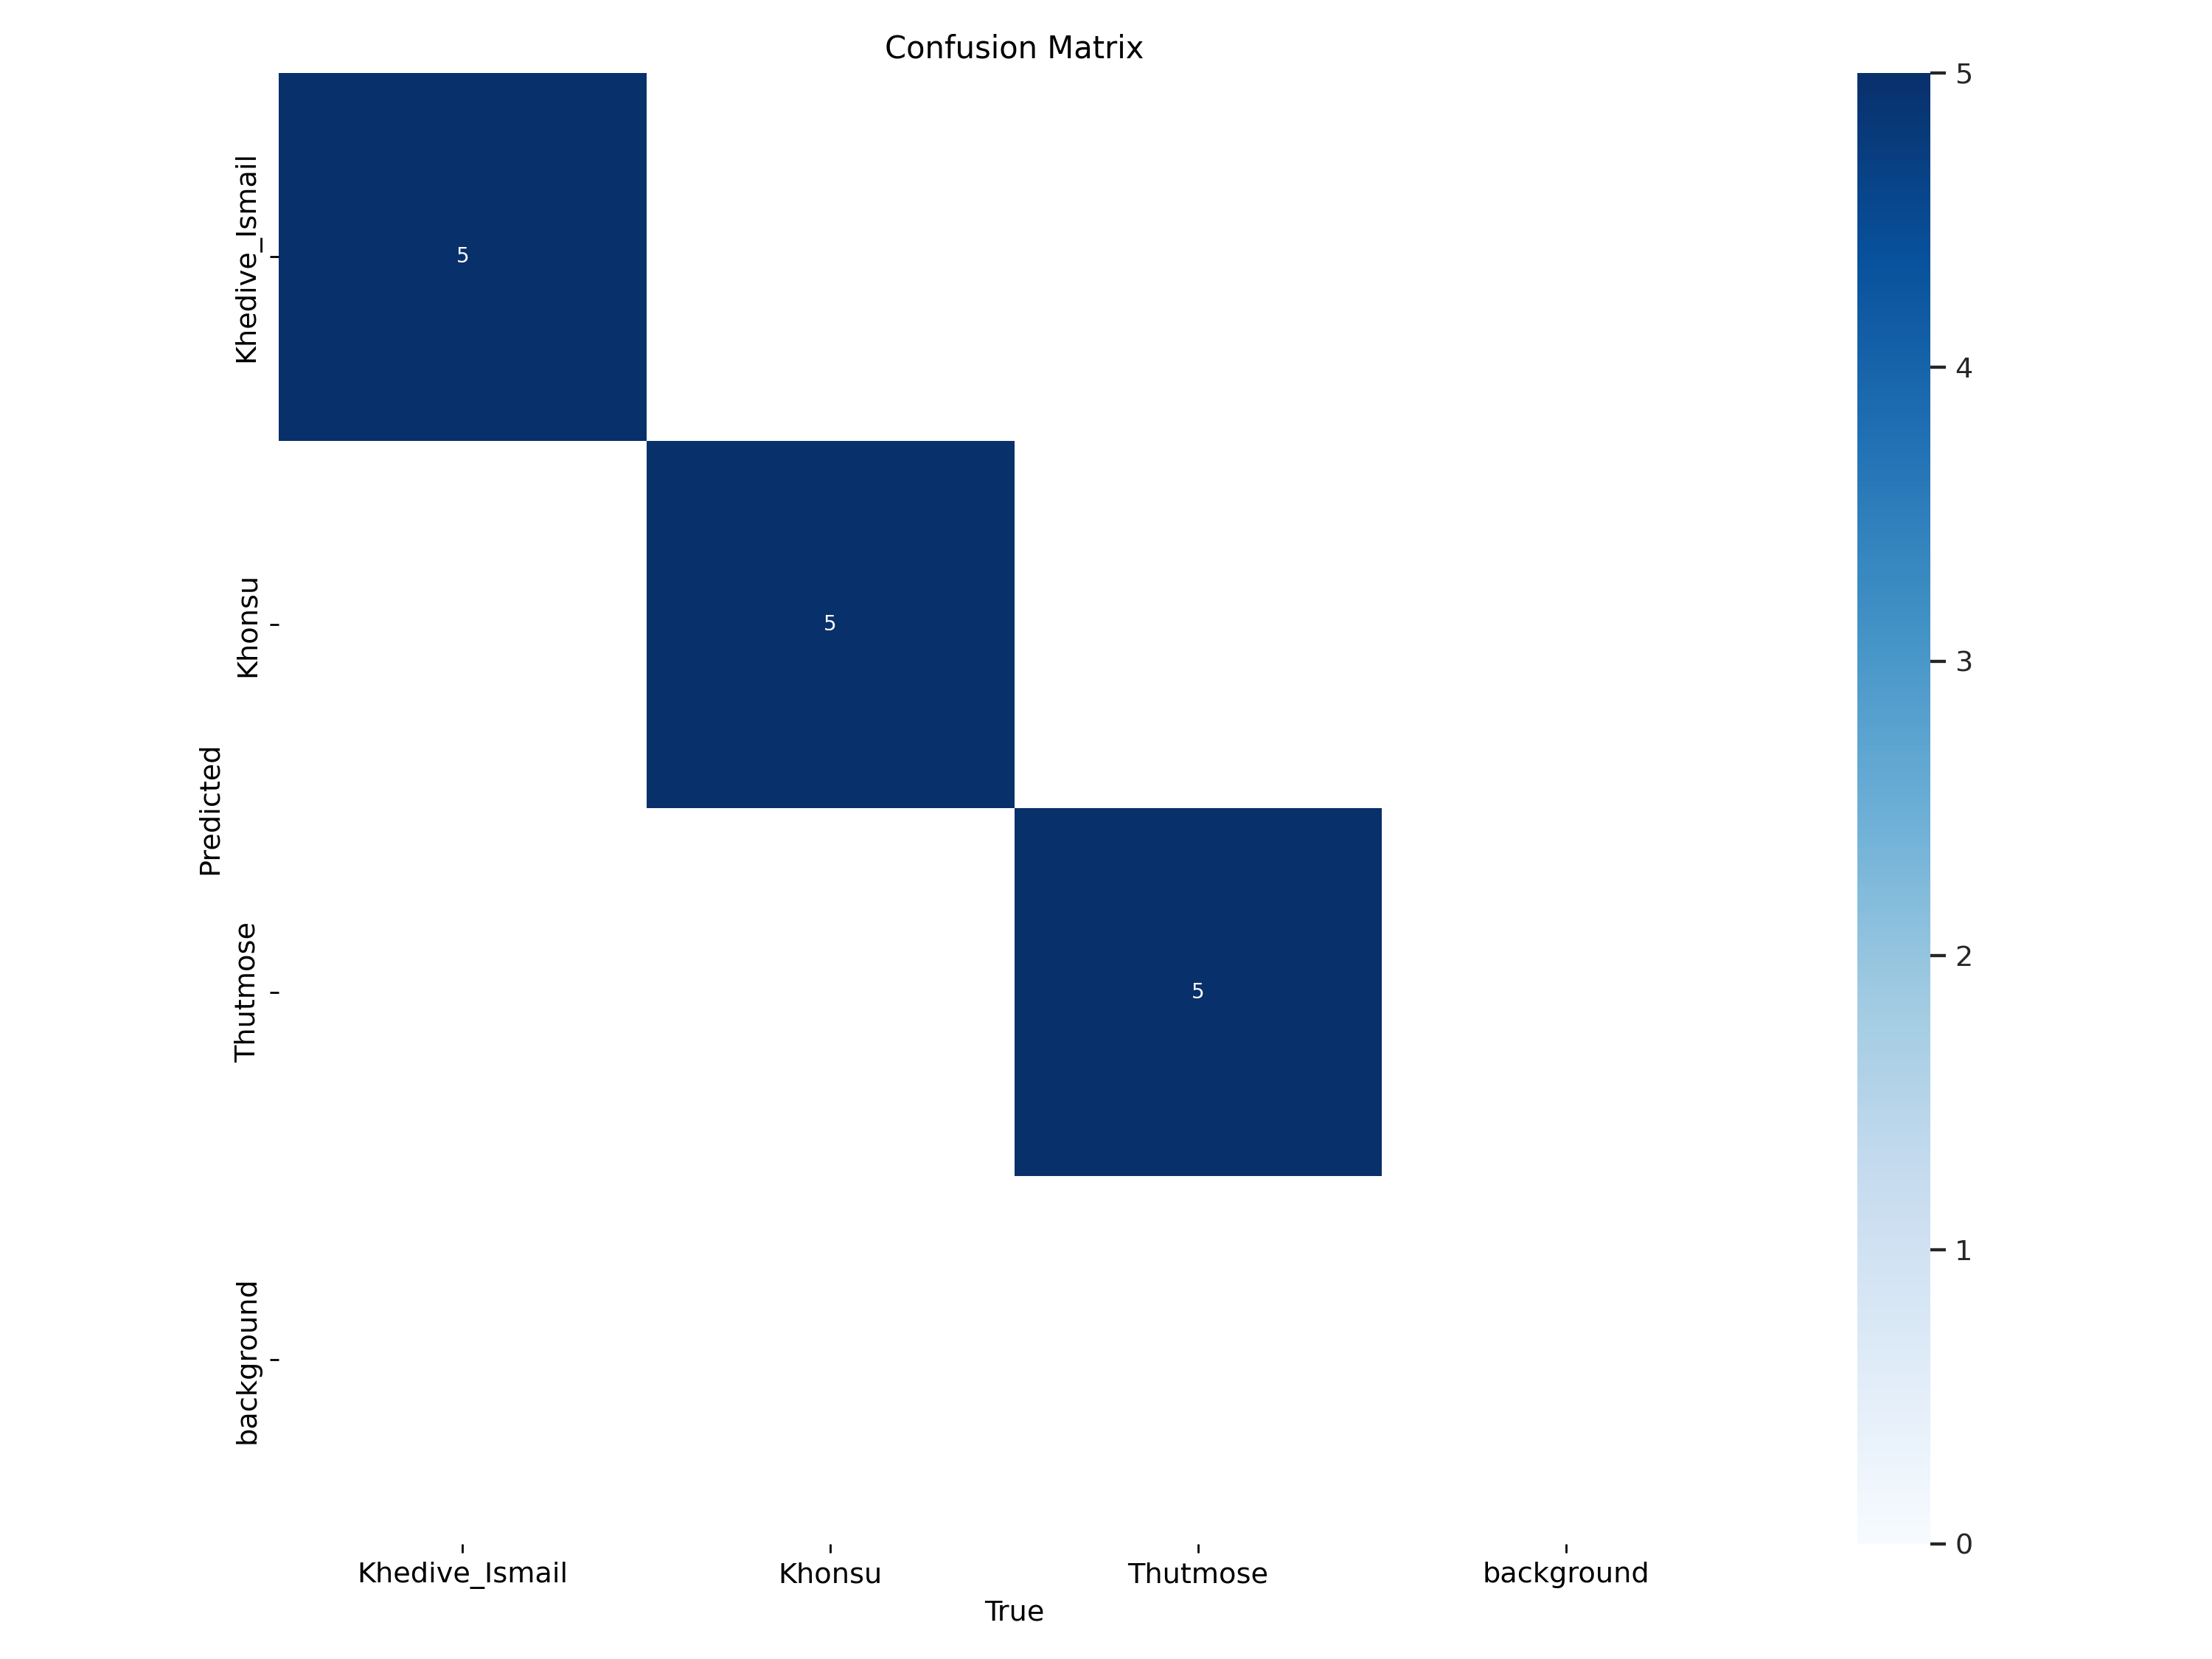

In [7]:
Image("/content/runs/detect/train/confusion_matrix.png",width= 800)

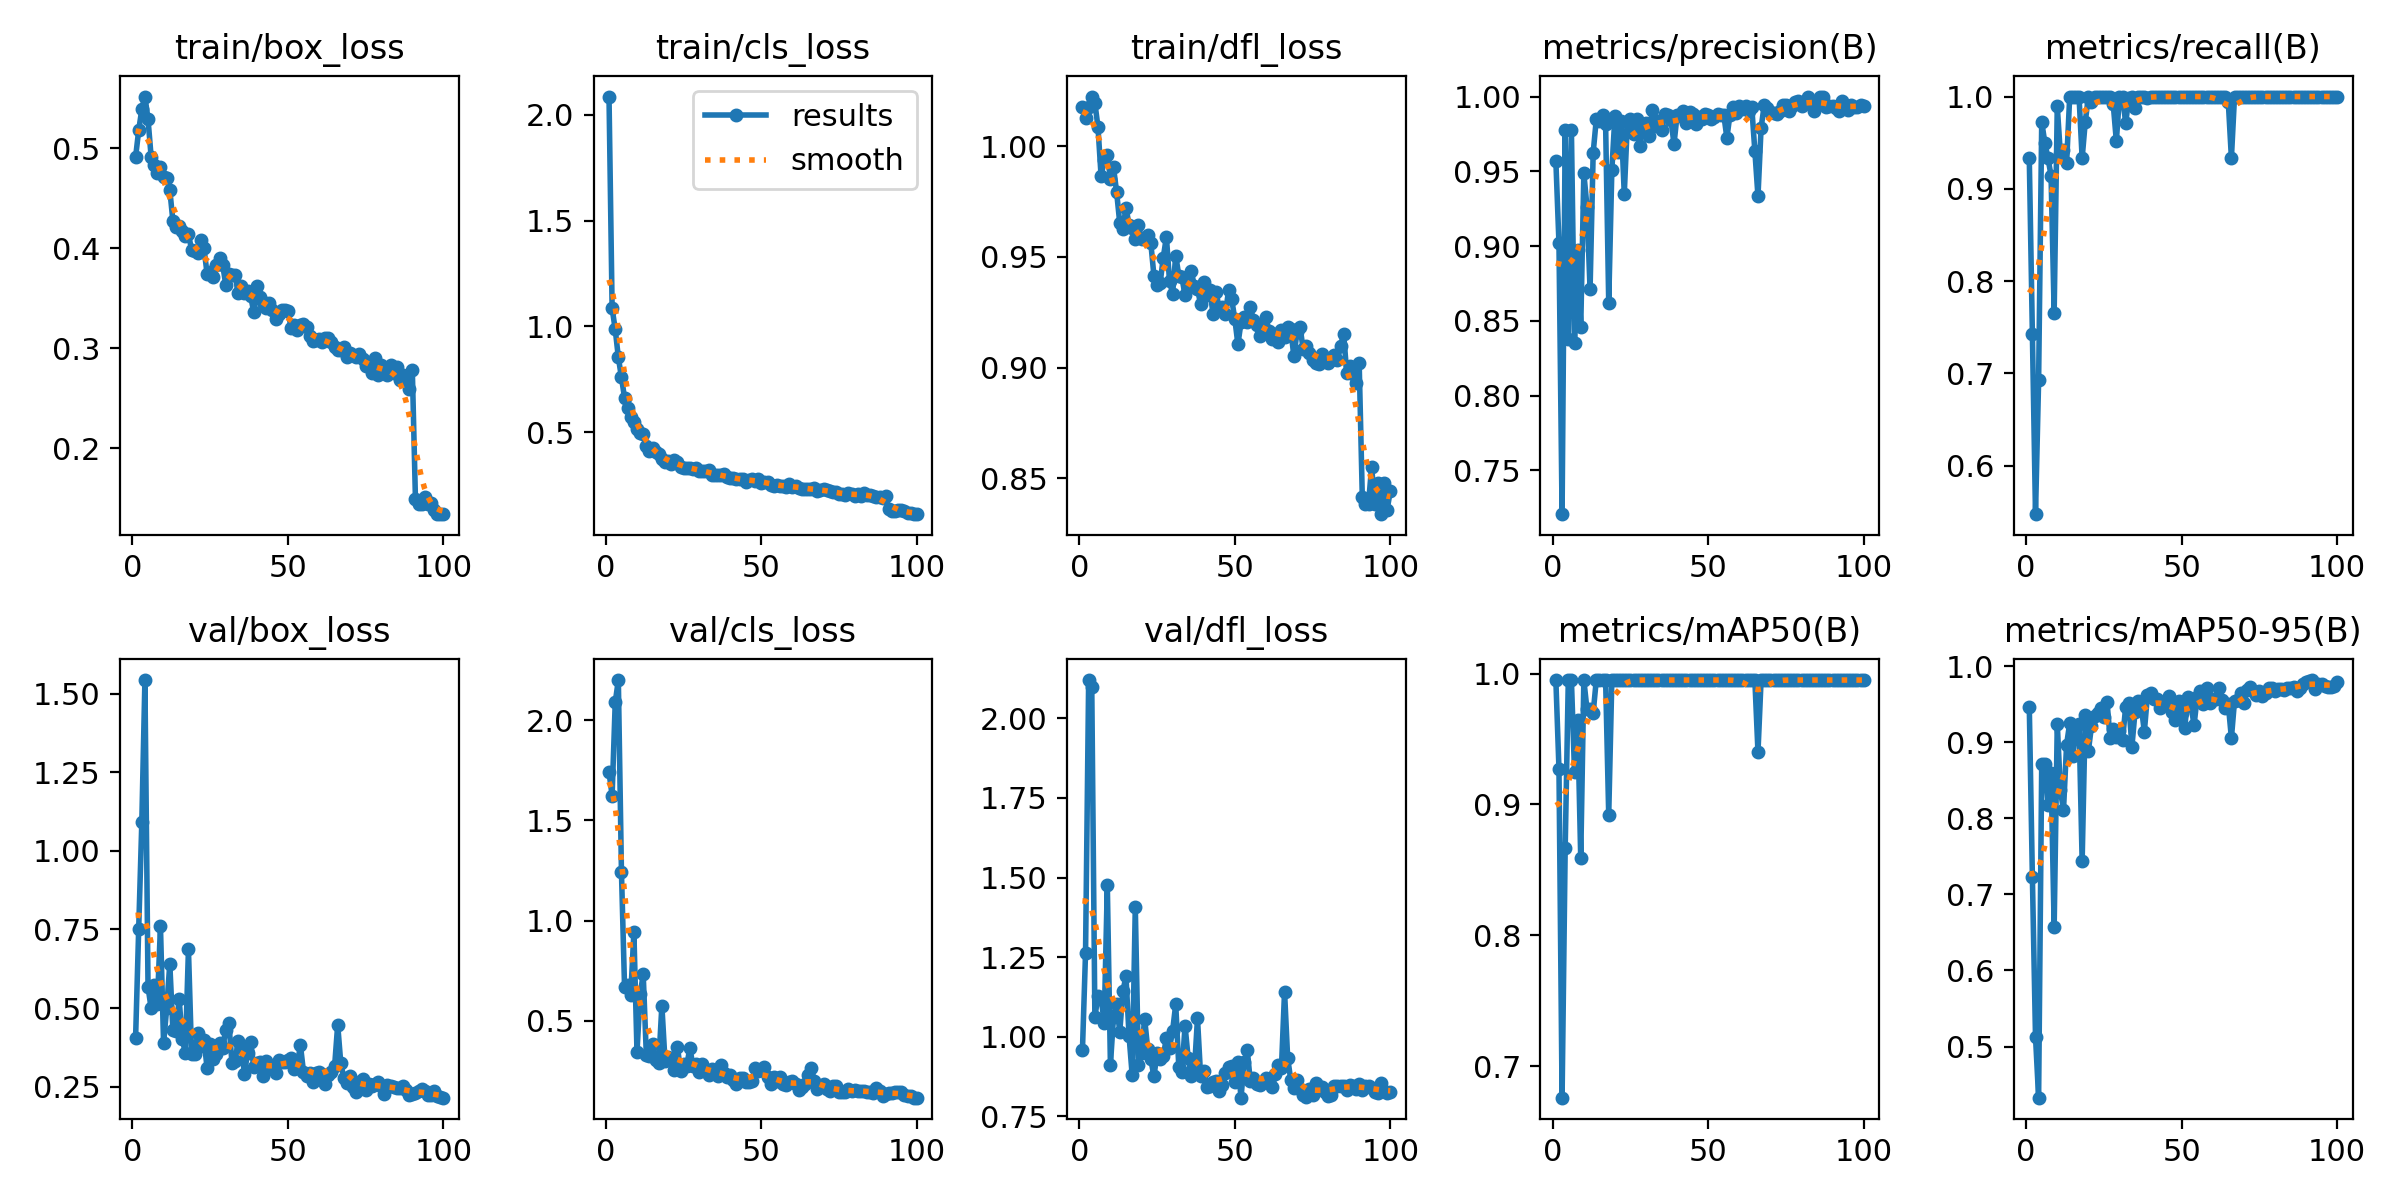

In [8]:
Image("/content/runs/detect/train/results.png",width= 800)

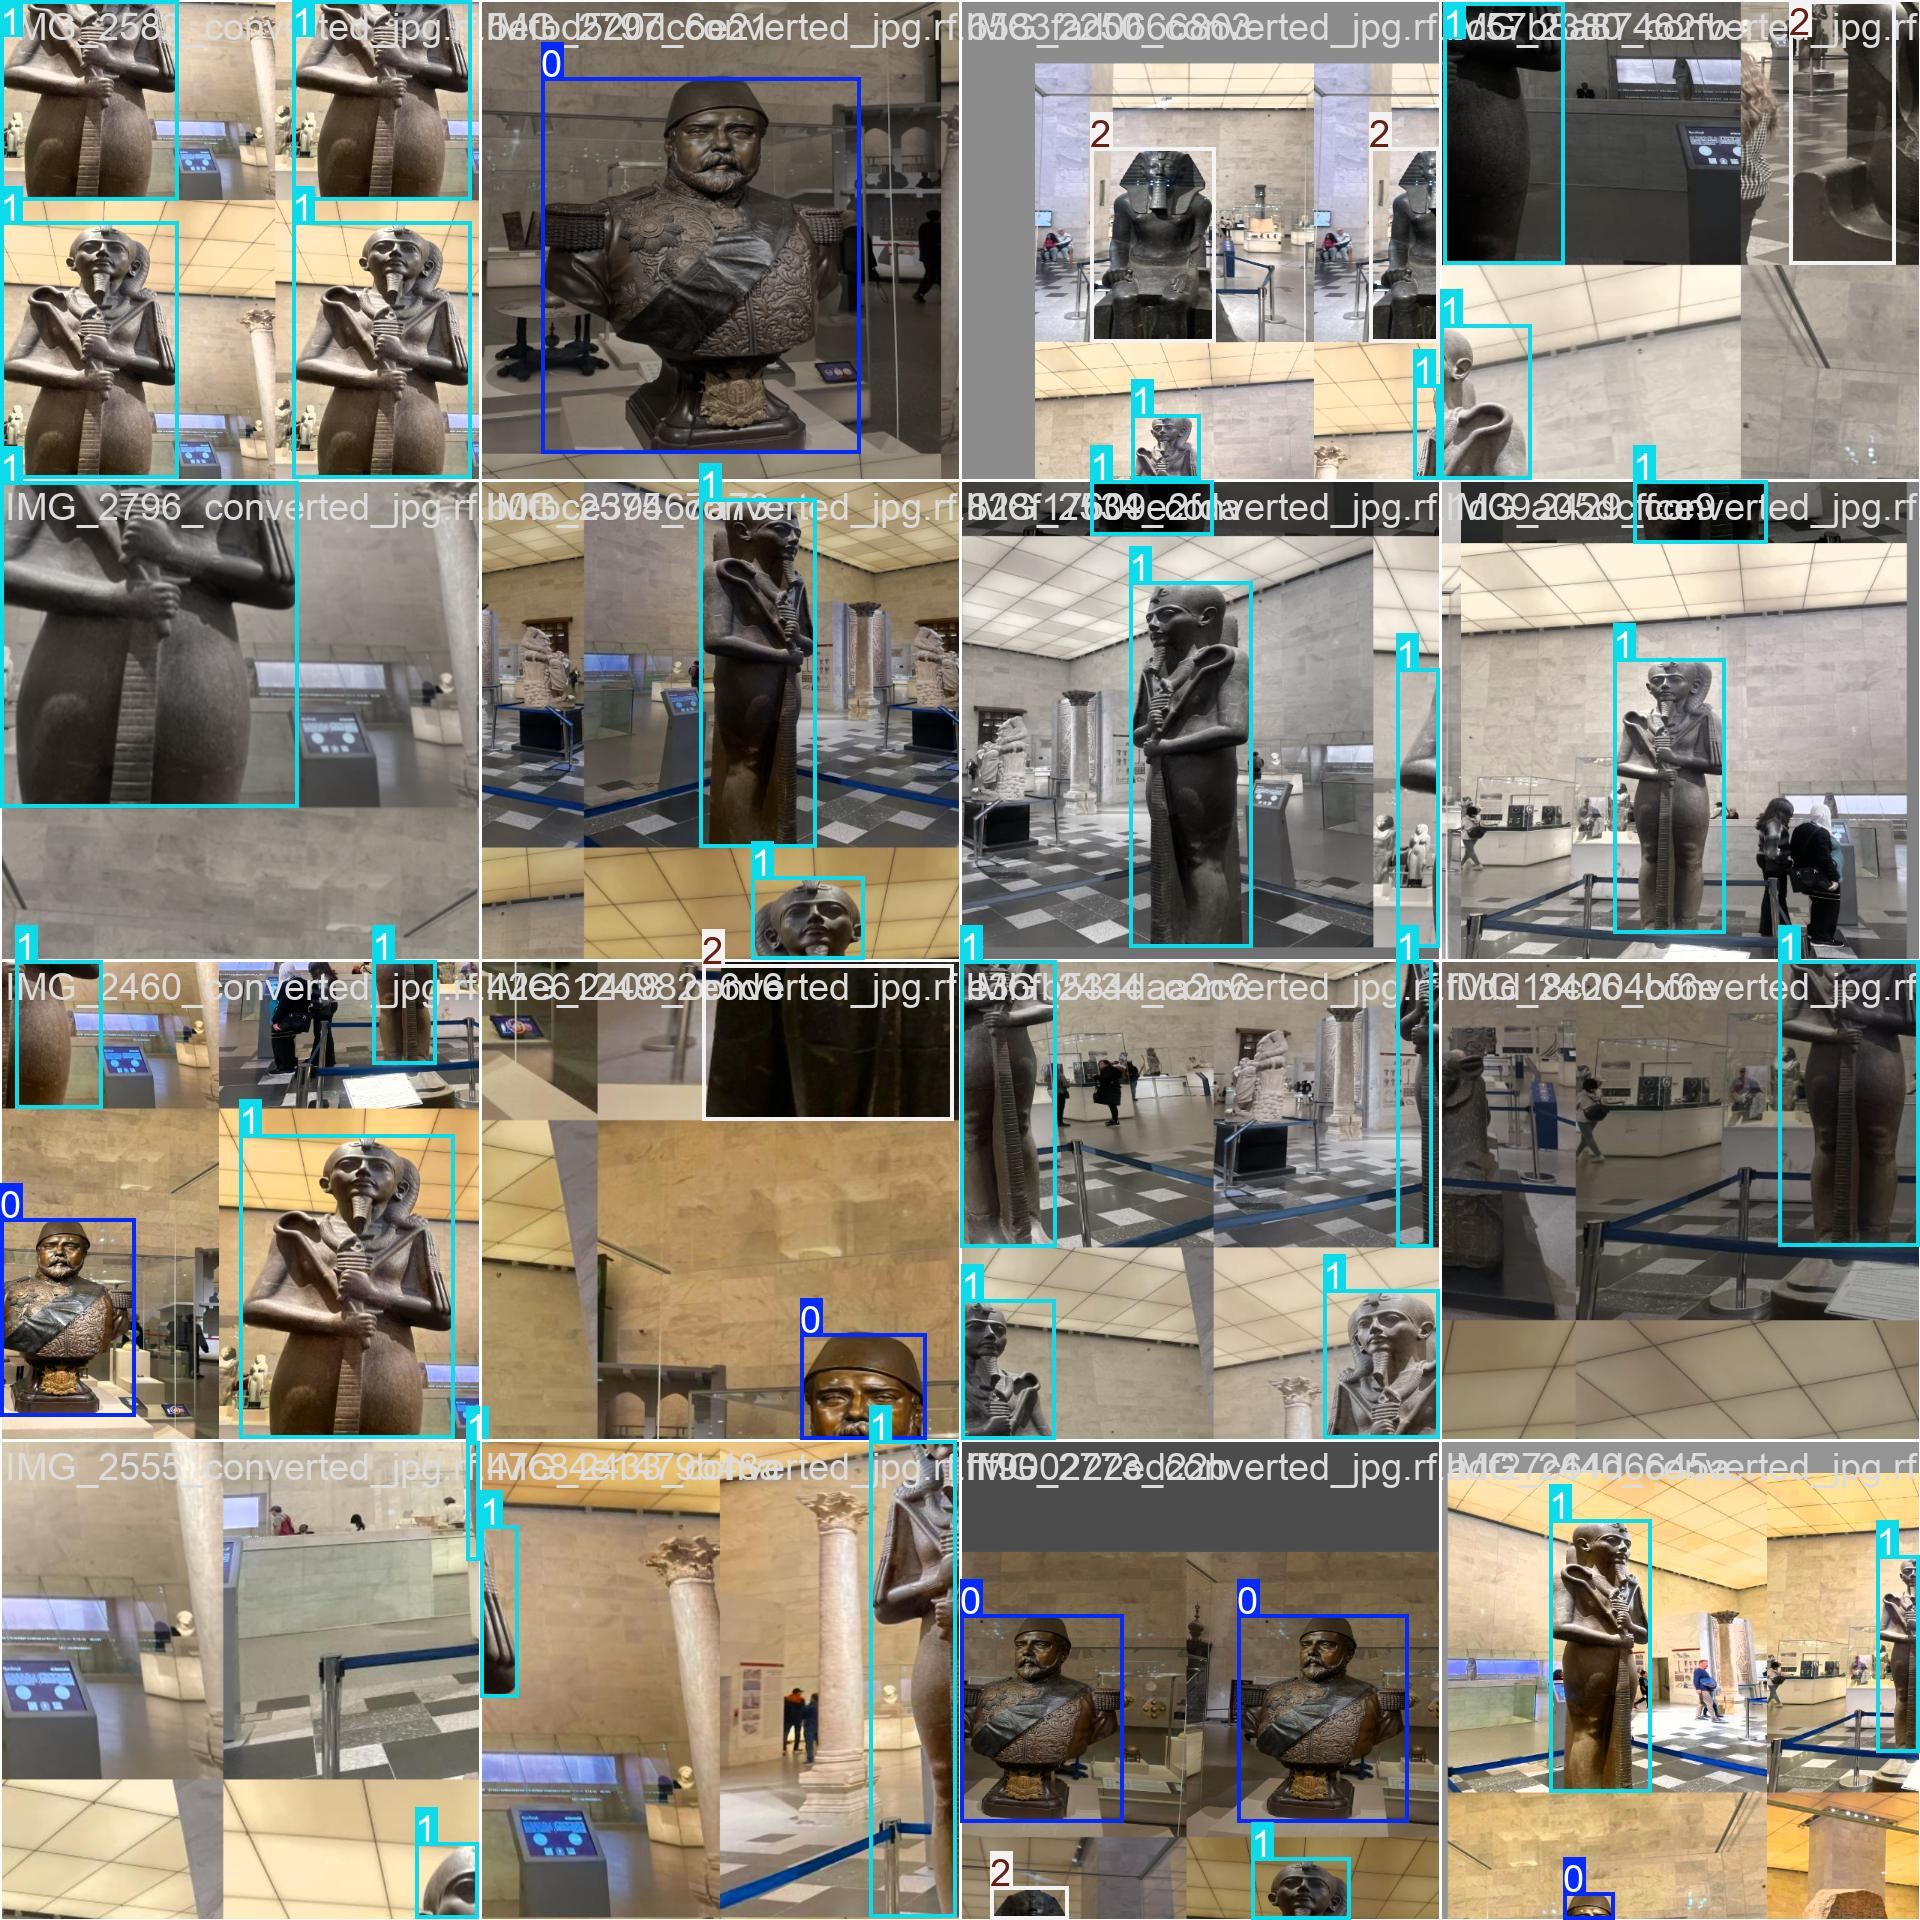

In [9]:
Image("/content/runs/detect/train/train_batch0.jpg",width= 800)

In [10]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Grad-3/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.01it/s]
                   all         15         15       0.99          1      0.995      0.982
        Khedive_Ismail          5          5       0.99          1      0.995      0.982
                Khonsu          5          5       0.99          1      0.995      0.995
              Thutmose          5          5      0.991          1      0.995      0.969
Speed: 0.2ms preprocess, 5.5ms inference, 0.0ms loss, 48.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/3 /content/Grad-3/test/images/IMG_2237_converted_jpg.rf.b45f4eee938e703c64f6cc3f6ad2c865.jpg: 640x640 1 Thutmose, 13.1ms
image 2/3 /content/Grad-3/test/images/IMG_2419_converted_jpg.rf.256f5aea53685c297e2899154d566cb4.jpg: 640x640 1 Khonsu, 12.0ms
image 3/3 /content/Grad-3/test/images/Khedive_Ismail_0016_jpg.rf.d2a934e43dff1bf70886b5239f7fa476.jpg: 640x640 1 Khedive_Ismail, 11.3ms
Speed: 2.4ms preprocess, 12.2ms inference, 270.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


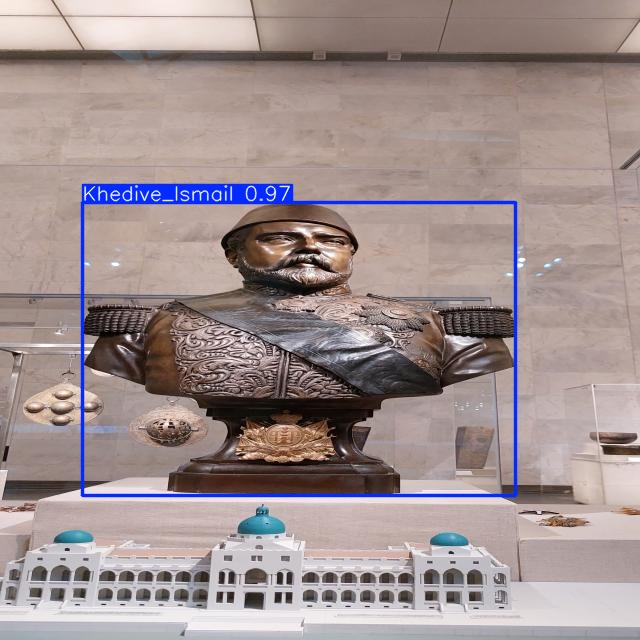

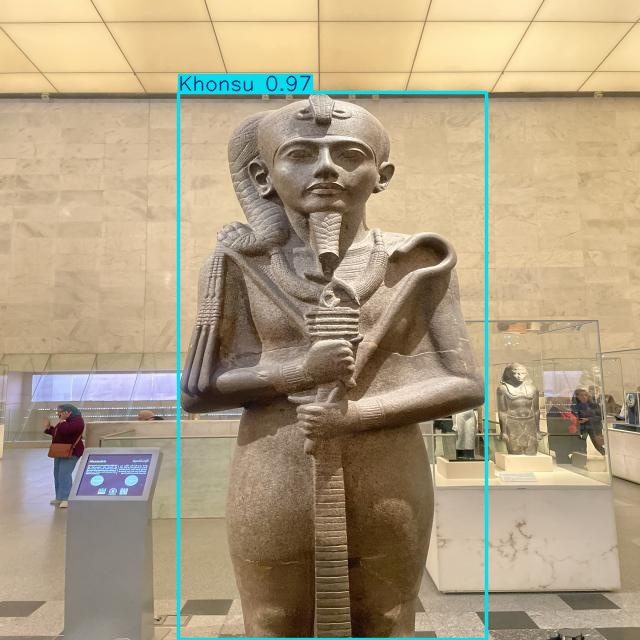

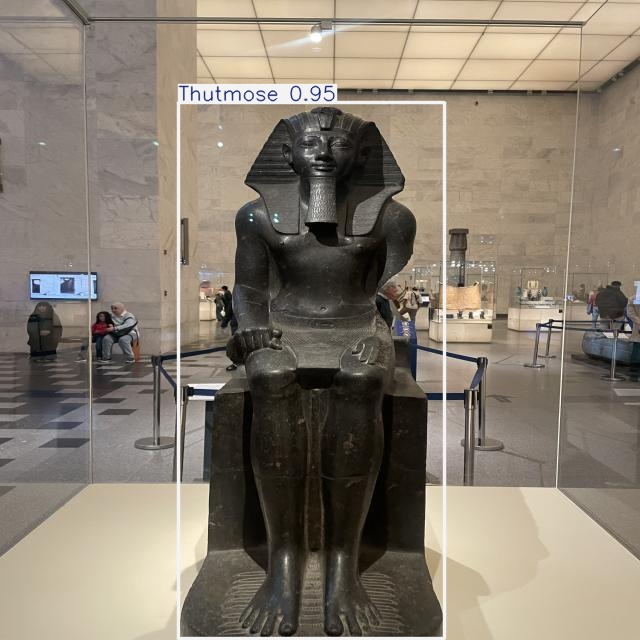

In [15]:

import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[0:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [20]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source="/content/King_Thutmose_III_0017.JPG"

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/King_Thutmose_III_0017.JPG: 640x448 1 Thutmose, 43.8ms
Speed: 4.4ms preprocess, 43.8ms inference, 662.4ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [21]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source="/content/Khonsu_0020.JPG"

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Khonsu_0020.JPG: 640x448 1 Khonsu, 52.9ms
Speed: 4.3ms preprocess, 52.9ms inference, 930.6ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [22]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source="/content/Khedive_Ismail_0020.jpg"

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/Khedive_Ismail_0020.jpg: 640x288 1 Khedive_Ismail, 42.4ms
Speed: 2.2ms preprocess, 42.4ms inference, 736.1ms postprocess per image at shape (1, 3, 640, 288)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict
